# Natural Language Processing

## Introduction


Le NLP est un domaine de l'apprentissage automatique qui permet de doter à un ordinateur la capacité de comprendre, analyser, manipuler et potentiellement générer un langage humain.


**Domaines d'applications du NLP**

* **Recherche d'informations** (Google trouve des résultats pertinents et similaires).<br><br>
* **Extraction d'informations** (Gmail structure les événements à partir des e-mails).<br><br>
* **Traduction automatique** (Google Translate traduit une langue d'une langue à une autre).<br><br>
* **Simplification du texte** (Rewordify simplifie le sens des phrases). Les tweets de Shashi Tharoor pourraient être utilisés (jeu de mots).<br><br>
* **Analyse des sentiments** (Hater News nous donne le sentiment de l'utilisateur).<br><br>
* **Synthèse de texte** (l'autotldr de Smmry ou Reddit donne un résumé des phrases).<br><br>
* **Filtre anti-spam** (Gmail filtre les spams séparément).<br><br>
* **Auto-Predict** (la recherche Google prédit les résultats de recherche des utilisateurs).<br><br>
* **Correction automatique** (le clavier Google et les mots corrects par la grammaire sont autrement mal orthographiés).<br><br>
* **Reconnaissance vocale** (Google WebSpeech ou Vocalware).<br><br>
* **Question Answering** (réponses d'IBM Watson à une requête).<br><br>
* **Natural Language Generation** (Génération de texte à partir de données image ou vidéo.)<br><br>

## I- Natural language ToolKit (NLTK)

NLTK est un package open-source populaire en Python. Plutôt que de créer tous les outils à partir de zéro, NLTK fournit des outiles pour toutes les tâches NLP courantes.

**Installation de NLTK**

**_! pip install nltk_** 

ou 

**_conda install -c conda-forge nltk_**.

In [ ]:
pip install nltk

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')

## II- Lecture et exploration de dataset

Lors de la lecture des données, nous obtenons des données au format structuré ou non structuré. Un format structuré a un modèle bien défini tandis que les données non structurées n'ont pas de structure appropriée. Entre les 2 structures, nous avons un format semi-structuré qui est un format comparativement mieux structuré que non structuré.

In [2]:
rawData = open("data/SMSSpamCollection.tsv").read()
rawData[0:250]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup fi"

Comme nous pouvons le voir, lorsque nous lisons des données semi-structurées, il est difficile de les interpréter, nous utilisons donc pandas pour comprendre facilement nos données.

In [3]:
import pandas as pd
data = pd.read_csv("data/SMSSpamCollection.tsv",sep="\t", 
                   names=['label','body_text'], header=None)
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Données de prétraitement

Le nettoyage des données textuelles est nécessaire pour mettre en évidence les attributs que nous voulons que notre système d'apprentissage automatique reprenne. Le nettoyage (ou le prétraitement) des données comprend généralement un certain nombre d'étapes:

#### 1. Supprimer la ponctuation

La ponctuation peut fournir un contexte grammatical à une phrase qui soutient notre compréhension. Mais pour notre vectoriseur qui compte le nombre de mots et non le contexte, il n'ajoute pas de valeur, nous supprimons donc tous les caractères spéciaux. par exemple: 

Comment vas-tu?   ->   Comment vas-tu

In [11]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punct(text):
    text_no_punct = ''.join([char for char in text if char not in 
                             string.punctuation])
    return text_no_punct

data['body_text_nopunct'] = data['body_text'].apply(lambda x: remove_punct(x))
data.head(10)                            

,label,body_text,body_text_nopunct
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...


In [8]:
text = "biha hiv . jojonoj , oabfia"
punct = ['?',',','.']
def remove(text):
    res = []
    for c in text:
        if c not in punct:
            res.append(c)
    return ''.join(res)

In [9]:
print(remove(text))

biha hiv  jojonoj  oabfia


#### 2. Tokenisation

La création de jetons sépare le texte en unités telles que des phrases ou des mots. Il donne une structure au texte précédemment non structuré. Par exemple: na nga def-> «na», «nga», «def».

In [19]:
sent = 'La     , : # _ création de jetons sépare le texte en unités telles que des phrases ou des mots'

sent.split(' ')

['La',
 '',
 '',
 '',
 '',
 ',',
 ':',
 '#',
 '_',
 'création',
 'de',
 'jetons',
 'sépare',
 'le',
 'texte',
 'en',
 'unités',
 'telles',
 'que',
 'des',
 'phrases',
 'ou',
 'des',
 'mots']

In [8]:
import re
def tokenizer(text):
    tokens = re.split('\W+',text)
    return tokens

data['body_text_tokenized']=data['body_text_nopunct'].apply(lambda x: tokenizer(x))
data.head()                            

,label,body_text,body_text_nopunct,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


#### 3. Remove stopwords

In [22]:
stopWords = nltk.corpus.stopwords.words('english')
len(stopWords)

179

In [ ]:
nltk.download()

In [10]:
def remove_stopwords(tokenized_list):
    text_no_stop = [word  for word in tokenized_list if word not in stopWords]
    return text_no_stop

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: 
                                                             remove_stopwords(x))
data.head() 

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


In [ ]:
def remove_stopwords(tokenized_list):
    text_no_stop = []
    for word in tekenized_list:
        if word not in stopWords:
            text_no_stop.append(word)
    return text_no_stop

#### 4. Stemming

La stemming permet de réduire un mot à sa forme de stem. Il est souvent judicieux de traiter les mots apparentés de la même manière. Il supprime les terminaisons, comme «ing», «ly», «s», etc. par une approche simple basée sur des règles. Cela réduit le corpus de mots mais souvent les mots réels sont négligés. Par exemple: Entitling, Entitled-> Entitl

Remarque: certains moteurs de recherche traitent les mots avec le même radical comme des synonymes.

In [11]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))
data.head(10)    

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, I,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, have, A, date, ON, sunday, with, will]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[As, per, your, request, Melle, Melle, Oru, Mi...","[As, per, request, Melle, Melle, Oru, Minnamin...","[As, per, request, mell, mell, oru, minnaminun..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[WINNER, As, a, valued, network, customer, you...","[WINNER, As, valued, network, customer, select...","[winner, As, valu, network, custom, select, re..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[Had, your, mobile, 11, months, or, more, U, R...","[Had, mobile, 11, months, U, R, entitled, Upda...","[had, mobil, 11, month, U, R, entitl, updat, l..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[Im, gonna, be, home, soon, and, i, dont, want...","[Im, gonna, home, soon, dont, want, talk, stuf...","[Im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[SIX, chances, to, win, CASH, From, 100, to, 2...","[SIX, chances, win, CASH, From, 100, 20000, po...","[six, chanc, win, cash, from, 100, 20000, poun..."


#### 5. Lemmatisation

La lemmatisation dérive la forme canonique («lemme») d’un mot. c'est-à-dire la forme racine. C'est mieux que le radical car il utilise une approche basée sur un dictionnaire, c'est-à-dire une analyse morphologique du mot racine.eg: Entitling, Entitled-> Entitle

De manière ramassée, le Stemming est généralement plus rapide car il coupe simplement la fin du mot, sans comprendre le contexte du mot. La lemmatisation est plus lente et plus précise car elle nécessite une analyse éclairée avec le contexte du mot.

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
wn = nltk.WordNetLemmatizer()
def lemmatize(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: 
                                                              lemmatize(x))
data.head(10)   

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, I,...","[Ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like...","[Even, brother, like, speak, They, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, have, A, date, ON, sunday, with, will]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[As, per, your, request, Melle, Melle, Oru, Mi...","[As, per, request, Melle, Melle, Oru, Minnamin...","[As, per, request, mell, mell, oru, minnaminun...","[As, per, request, Melle, Melle, Oru, Minnamin..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[WINNER, As, a, valued, network, customer, you...","[WINNER, As, valued, network, customer, select...","[winner, As, valu, network, custom, select, re...","[WINNER, As, valued, network, customer, select..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[Had, your, mobile, 11, months, or, more, U, R...","[Had, mobile, 11, months, U, R, entitled, Upda...","[had, mobil, 11, month, U, R, entitl, updat, l...","[Had, mobile, 11, month, U, R, entitled, Updat..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[Im, gonna, be, home, soon, and, i, dont, want...","[Im, gonna, home, soon, dont, want, talk, stuf...","[Im, gonna, home, soon, dont, want, talk, stuf...","[Im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[SIX, chances, to, win, CASH, From, 100, to, 2...","[SIX, chances, win, CASH, From, 100, 20000, po...","[six, chanc, win, cash, from, 100, 20000, poun...","[SIX, chance, win, CASH, From, 100, 20000, pou..."


In [18]:
data.shape

(5568, 7)

#### 6. Vectorisation des données

La vectorisation est le processus de codage du texte sous forme d'entiers, c'est-à-dire sous forme numérique pour créer des vecteurs de caractéristiques afin que les algorithmes d'apprentissage automatique puissent comprendre nos données

#####  a.  Sac-de-mots
Bag of Words (BoW) ou CountVectorizer décrit la présence de mots dans les données textuelles. Il donne un résultat de 1 s'il est présent dans la phrase et de 0 s'il n'est pas présent. Il crée donc un sac de mots avec un nombre de matrice de document dans chaque document texte.

In [4]:
import pandas as pd
import re
import string
import nltk

#pd.set_option('display.max_colwidth',100) #To extend column width

stopWords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
data = pd.read_csv("data/SMSSpamCollection.tsv",sep="\t", names=['label','body_text'], header=None)
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
def clean_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])#remove puctuation
    tokens = re.split('\W+',text)#tokenization
    text = [ps.stem(word) for word in tokens if word not in stopWords]#remove stop words and stemming
    return text
    

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer = clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(X_counts.toarray())
#print(count_vect.get_feature_names())

(5568, 8337)


In [32]:
X_counts

<5568x8337 sparse matrix of type '<class 'numpy.int64'>'
	with 55740 stored elements in Compressed Sparse Row format>

In [9]:
X_counts_df = pd.DataFrame(X_counts.toarray(), 
                           columns= count_vect.get_feature_names() )
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zoe,zogtoriu,zoom,zouk,zyada,Ü,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


BOW est appliqué au body_text, de sorte que le nombre de chaque mot est stocké dans la matrice du document. (Vérifiez le repo).

##### b. N-grammes

Les n-grammes sont simplement toutes les combinaisons de mots adjacents ou de lettres de longueur n que nous pouvons trouver dans notre texte source. Les ngrams avec n = 1 sont appelés unigrammes. De même, les bigrammes (n = 2), les trigrammes (n = 3) et ainsi de suite peuvent également être utilisés.


Les unigrammes ne contiennent généralement pas beaucoup d'informations par rapport aux bigrammes et trigrammes. Le principe de base des n-grammes est qu'ils capturent la lettre ou le mot qui suivra probablement le mot donné. Plus le n-gramme est long (n supérieur), plus vous devez travailler avec de contexte.

In [13]:
data = pd.read_csv("data/SMSSpamCollection.tsv",sep="\t", names=['label','body_text'], header=None)
data.head()
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(3,3))
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
#print(count_vect.get_feature_names())

(5568, 54410)


In [11]:
X_counts_df = pd.DataFrame(X_counts.toarray(), 
                           columns= count_vect.get_feature_names() )
X_counts_df.head()

,00 in,00 per,00 sub,00 subs,000 bonus,000 cash,000 homeowners,000 pounds,000 price,000 prize,...,zhong se,zindgi wo,zoe 18,zoe it,zogtorius ve,zoom to,zouk with,zyada kisi,ú1 20,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


N-Gram est appliqué au body_text, de sorte que le nombre de mots de chaque groupe dans un mot de phrase est stocké dans la matrice du document. (Vérifiez le repo).

##### c. TF-IDF

Il calcule la «fréquence relative» à laquelle un mot apparaît dans un document par rapport à sa fréquence dans tous les documents. Il est plus utile que le «terme fréquence» pour identifier les mots «importants» dans chaque document (fréquence élevée dans ce document, fréquence basse dans d'autres documents).
Remarque: utilisé pour le scoring des moteurs de recherche, la synthèse de texte, le regroupement de documents.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8337)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [44]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vect.get_feature_names() )
X_tfidf_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zoe,zogtoriu,zoom,zouk,zyada,Ü,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

TF-IDF est appliqué au body_text, de sorte que le nombre relatif de chaque mot dans les phrases est stocké dans la matrice du document. (Vérifiez le repo).

Remarque: les vectoriseurs produisent des matrices creuses. Sparse Matrix est une matrice dans laquelle la plupart des entrées sont 0. Dans l'intérêt d'un stockage efficace, une matrice creuse sera stockée en ne stockant que les emplacements des éléments non nuls.

#### Feature Engineering: Feature Creation

Le Feature Engineering consiste à utiliser la connaissance du domaine des données pour créer des fonctionnalités qui font fonctionner les algorithmes d'apprentissage automatique. C'est comme un art car il nécessite une connaissance du domaine et il peut être difficile de créer des fonctionnalités, mais il peut être utile pour l'algorithme de ML de prédire les résultats car ils peuvent être liés à la prédiction.

In [ ]:
import pandas as pd
data = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [45]:
import string

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


* body_len montre la longueur des mots à l'exclusion des espaces dans le corps d'un message.
<!--* ponctuation% indique le pourcentage de signes de ponctuation dans le corps d'un message.-->

**Vérifiez si les features sont bons ou non**

In [106]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

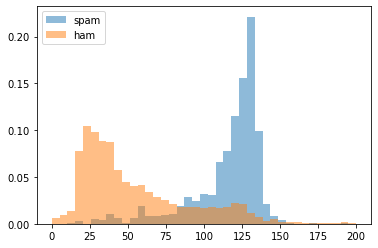

In [110]:
bins = np.linspace(0, 200, 40)
data1 = data[data['label']=='spam']['body_len']
data2 = data[data['label']== 'ham']['body_len']
weights1 = np.ones_like(data1)/float(len(data1))
weights2 = np.ones_like(data2)/float(len(data2))

plt.hist(data1, bins, alpha=0.5,weights=weights1, label='spam')
plt.hist(data2, bins, alpha=0.5,weights=weights2,  label='ham')
plt.legend(loc='upper left')
plt.show()

Nous pouvons clairement voir que les spams ont un nombre élevé de mots par rapport aux jambons. C'est donc une bonne caractéristique à distinguer.

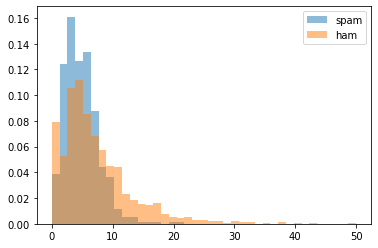

In [113]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins,  alpha=0.5,density=True, label='spam')
plt.hist(data[data['label']== 'ham']['punct%'] , bins, alpha=0.5,density=True, label= 'ham')
plt.legend(loc='upper right')
plt.show()

<br>